### Klib

Klib is an python library for importing,cleaning,analyzing and preprocessing data. While the focus is on these steps, Future versions will be include modules and functions for model creation and optimization to provide more of an end-to-end solution.


#### Installation
pip install klib

#### In conda notebook
conda install -c conda-forge klib

Data cleaning and Exploratory data analysis is the challenging task for everyone. Around 80% of time is taken for the data cleaning and EDA and remaining 20% is for model building and all other process. Because of it's time complexity, reasearchers introduced a more Automated libraries for perform Automated EDA and data cleaning operations with few lines of code.It helps to makes our work easier within the time.

Some of the automated libraries are.
1. Dtale
2. Sweetviz
3. Lux
4. Pandas profiling
5. Autoviz
6. Klib

The klib is a python library which is recently released, It helps to Speed up Data cleaning and exploratory data analysis. In this notebook we are going to deep in to this library.Let's begin

In [21]:
#Let's import the library
import klib
import pandas as pd
#display all columns
pd.pandas.set_option('display.max_columns',None)

In [22]:
#Get the data
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Missing values plot
Here we can examine the data quality. In otherwords, how clean is the dataset?
missingval_plot() -provide a high level overview of the missing values in a dataset. It pinpoints which columns and rows to examine in more detail.

__Top__ portion of the plot shows the aggregation for each column. Summary statistics is displayed on the right side.
__Bottom__ portion represents the missing vales in the dataframe.

GridSpec(6, 6)

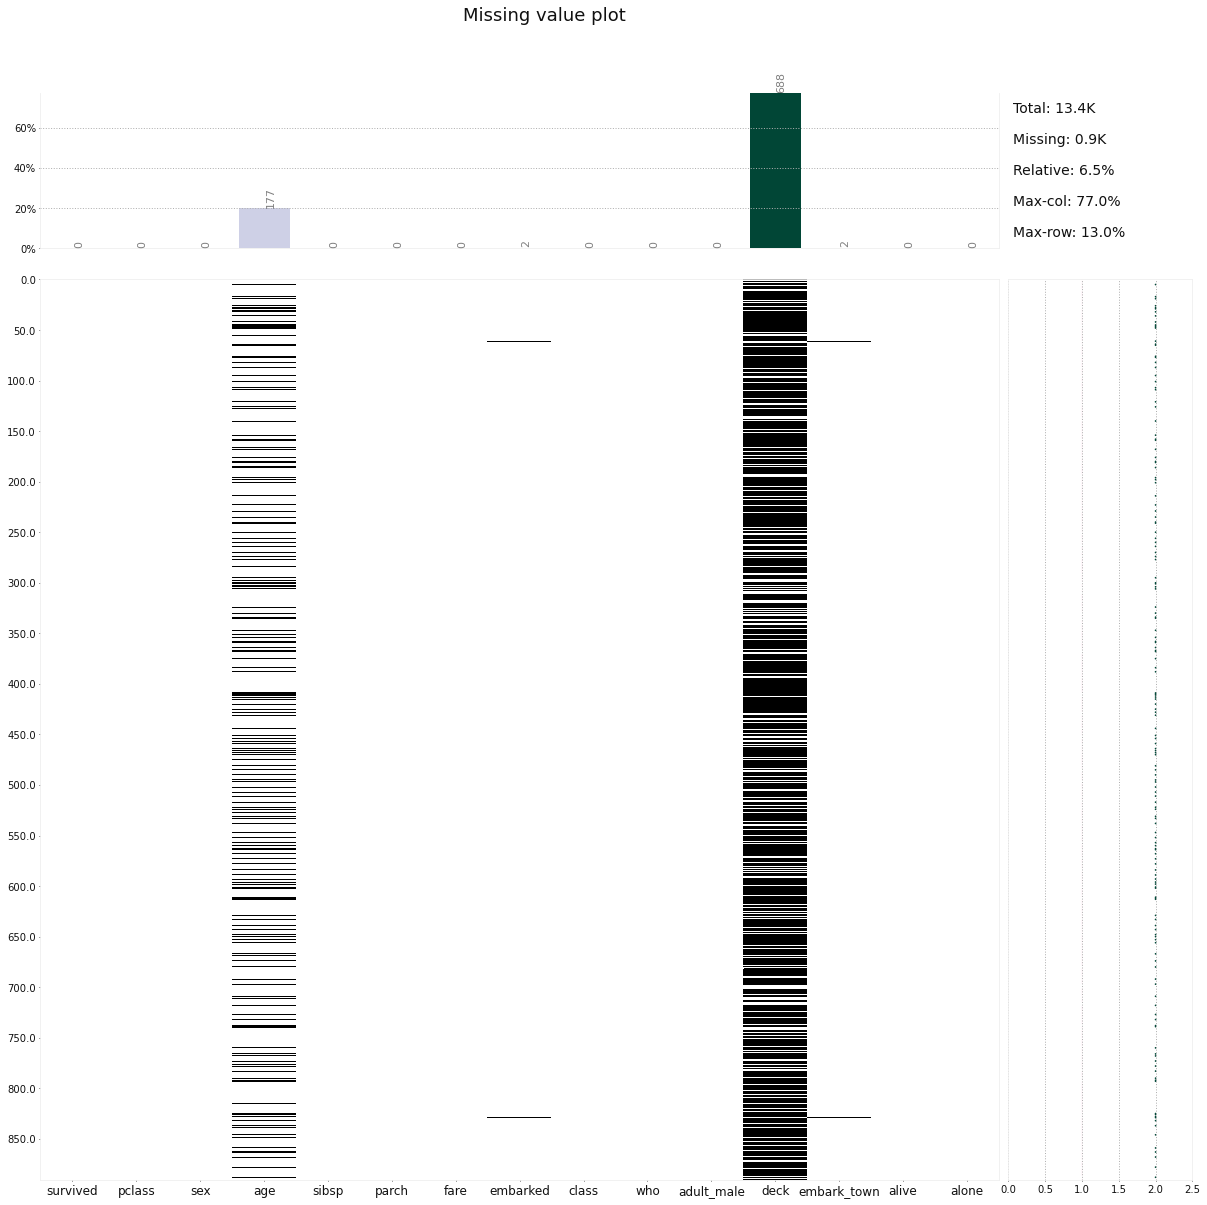

In [23]:
klib.missingval_plot(df)

### Data cleaning
The data_cleaning() function essentially drops empty and single valued columns as well as empty and duplicate rows.

In [24]:
df_cleaned=klib.data_cleaning(df)
df_cleaned

Shape of cleaned data: (784, 15)Remaining NAs: 692

Changes:
Dropped rows: 107
     of which 107 duplicates. (Rows: [47, 76, 77, 87, 95, 101, 121, 133, 173, 196, 198, 201, 213, 223, 241, 260, 274, 295, 300, 304, 313, 320, 324, 335, 343, 354, 355, 358, 359, 364, 368, 384, 409, 410, 413, 418, 420, 425, 428, 431, 454, 459, 464, 466, 470, 476, 481, 485, 488, 490, 494, 500, 511, 521, 522, 526, 531, 560, 563, 564, 568, 573, 588, 589, 598, 601, 612, 613, 614, 635, 636, 640, 641, 644, 646, 650, 656, 666, 674, 692, 696, 709, 732, 733, 734, 738, 739, 757, 758, 760, 773, 790, 792, 800, 808, 832, 837, 838, 844, 846, 859, 863, 870, 877, 878, 884, 886])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 177
Reduced memory by at least: 0.06 MB (-75.0%)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.283302,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925000,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.099998,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.050000,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.125000,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450001,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000000,C,First,man,True,C,Cherbourg,yes,True


### Correlation plot
Here we can examine the realtionship between the variables by using correlation

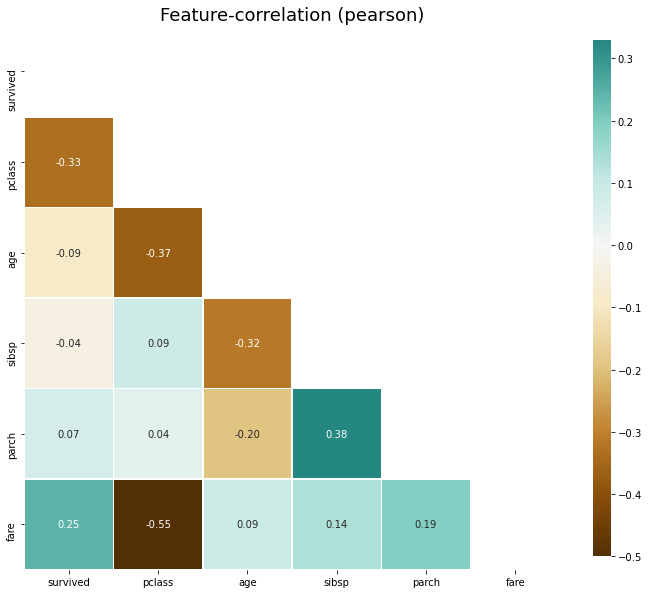

In [27]:
klib.corr_plot(df_cleaned,annot=True)

##### Display only positive correlation

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


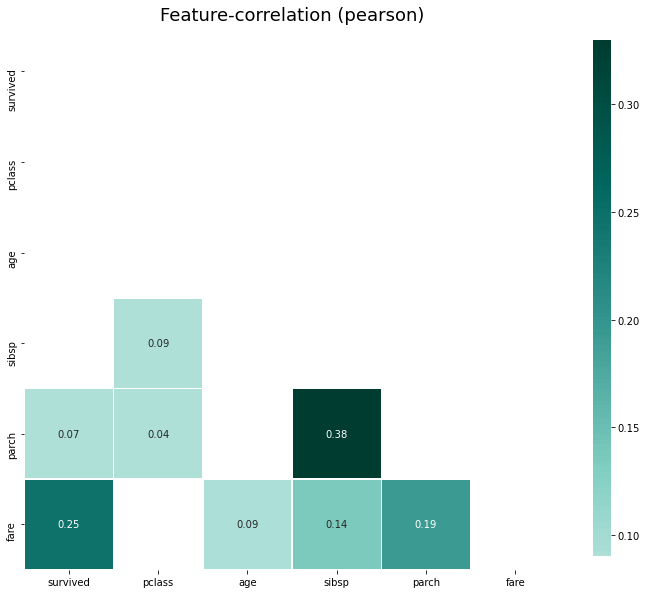

In [28]:
klib.corr_plot(df_cleaned,annot=True,split='pos')

##### Display only negitive columns

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


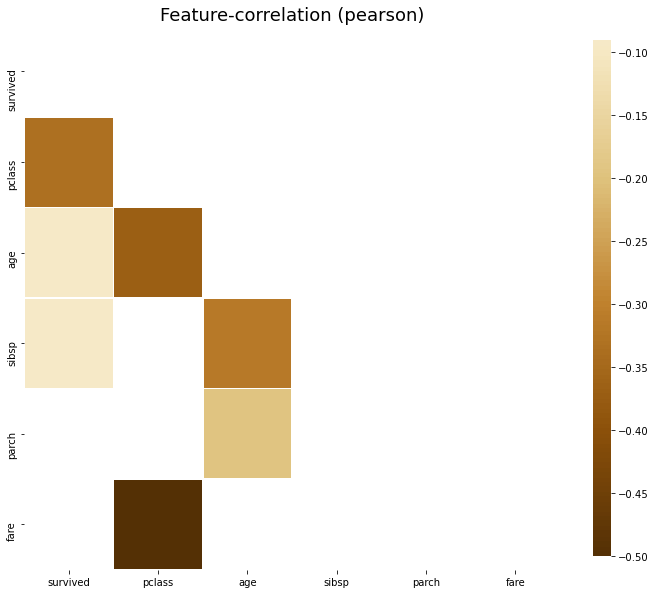

In [29]:
klib.corr_plot(df_cleaned,annot=False,split='neg')

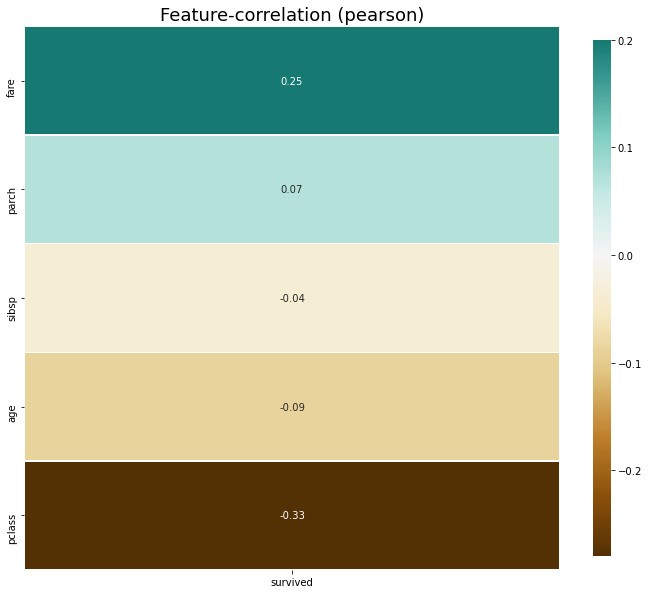

In [32]:
##### Display correlation with a target variable
klib.corr_plot(df_cleaned,target='survived')

### Correlation data matrix

In [34]:
klib.corr_mat(df_cleaned)

,survived,pclass,age,sibsp,parch,fare
survived,1.00,-0.33,-0.09,-0.04,0.07,0.25
pclass,-0.33,1.00,-0.37,0.09,0.04,-0.55
age,-0.09,-0.37,1.00,-0.32,-0.20,0.09
sibsp,-0.04,0.09,-0.32,1.00,0.38,0.14
parch,0.07,0.04,-0.20,0.38,1.00,0.19
fare,0.25,-0.55,0.09,0.14,0.19,1.00


### Distribution plot

Dropped 106 missing values from column age.


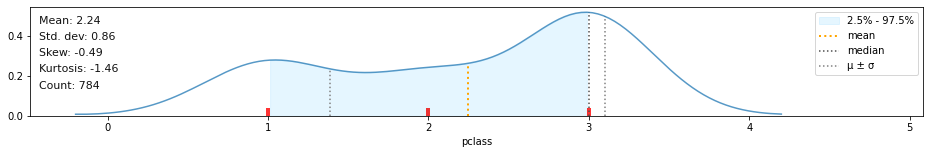

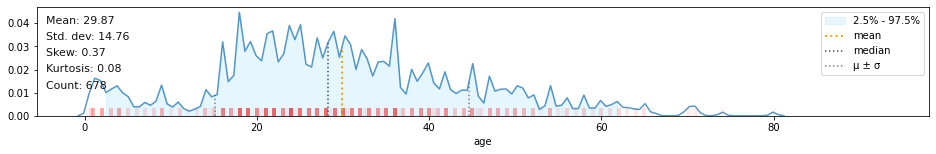

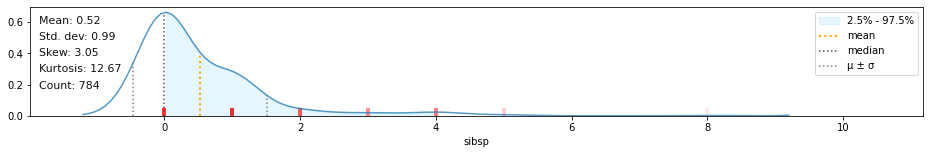

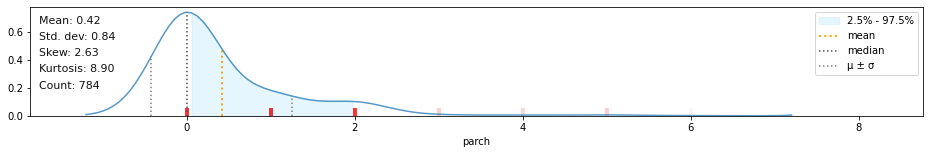

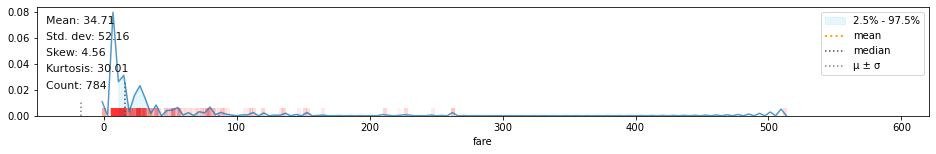

In [35]:
klib.dist_plot(df_cleaned)

### Train,test and split
Here we split the data in to train and test

In [61]:
klib.train_dev_test_split(df_cleaned,target='survived')

(     pclass     sex   age  sibsp  parch       fare embarked   class    who  \
 272       2  female  41.0      0      1  19.500000        S  Second  woman   
 303       2  female   NaN      0      0  12.350000        Q  Second  woman   
 593       3  female   NaN      0      2   7.750000        Q   Third  woman   
 499       3    male  24.0      0      0   7.795800        S   Third    man   
 477       3    male  29.0      1      0   7.045800        S   Third    man   
 ..      ...     ...   ...    ...    ...        ...      ...     ...    ...   
 590       3    male  35.0      0      0   7.125000        S   Third    man   
 496       1  female  54.0      1      0  78.266701        C   First  woman   
 277       2    male   NaN      0      0   0.000000        S  Second    man   
 128       3  female   NaN      1      1  22.358299        C   Third  woman   
 34        1    male  28.0      1      0  82.170799        C   First    man   
 
      adult_male deck  embark_town alive  alone  


### Feature selection
Provides common operations for feature selection

In [62]:
klib.feature_selection_pipe()

Pipeline(steps=[('variancethreshold', VarianceThreshold(threshold=0.1)),
                ('pipeinfo-1', PipeInfo(name='after var_thresh')),
                ('selectfrommodel',
                 SelectFromModel(estimator=LassoCV(cv=4, random_state=408),
                                 threshold='0.1*median')),
                ('pipeinfo-2', PipeInfo(name='after select_from_model')),
                ('selectpercentile', SelectPercentile(percentile=95)),
                ('pipeinfo-3', PipeInfo(name='after select_percentile'))])

### Num_pipe
Provide common operations for preprocesiing of numerical data

In [63]:
klib.num_pipe()

Pipeline(steps=[('columnselector', ColumnSelector()),
                ('iterativeimputer',
                 IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=25,
                                                                n_jobs=4,
                                                                random_state=408),
                                  random_state=408)),
                ('robustscaler', RobustScaler())])

### Cat_pie
Provides common operations for preprocessing of categorical data

In [64]:
klib.cat_pipe()

Pipeline(steps=[('columnselector', ColumnSelector(num=False)),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('pipeinfo', PipeInfo(name='after encoding categorical data')),
                ('maxabsscaler', MaxAbsScaler())])